In [23]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt


In [25]:
ess2002 = pd.read_stata("ESS_DATA/2002/ESS1e06_5.dta",convert_categoricals = False)

country_names = {"AT": "Austria",  "BE": "Belgium",  "CH": "Switzerland", "CZ": "Czech Republic", "DE": "Germany" , "DK": "Denmark", "ES": "Spain", "FI": "Finland", "FR": "France", "GB": "United Kingdom", "GR": "Greece",  "HU": "Hungary", "IE": "Ireland", "IL": "Israel", "IT": "Italy", "LU": "Luxembourg", "NL": "Netherlands", "NO": "Norway", "PL": "Poland", "PT": "Portugal", "SE": "Sweden", "SI": "Slovenia"}

for key, val in country_names.items():
    ess2002.cntry.loc[ess2002.cntry == key] = val



/usr/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [20]:
# print(len(list(ess2002.columns.values)))
#display(ess2002.head())
display(ess2002.lrscale.head())

0    6.0
1    6.0
2    5.0
3    5.0
4    5.0
Name: lrscale, dtype: float64

In [82]:
ideo = pd.melt(ess2002,id_vars = "cntry",value_vars = "lrscale")
#print(ideo["cntry"].unique())
#print(len(ideo["cntry"].unique()))


ideo = ideo.rename(columns = {"cntry": "país"})
# the scale is from 0 to 10 ! bigger then that are typos or "don't know"

non_valid_ideo = ideo.loc[ideo["value"]>10.0]
valid_ideo = ideo.loc[ideo["value"]<=10.0]

total_N = ideo.país.value_counts().rename("total_N")
non_valid_N = non_valid_ideo.país.value_counts().rename("non_valid_N") 
valid_N = valid_ideo.país.value_counts().rename("valid_N")




#ideo.país.describe()
#display(valid_ideo.head())
#display(non_valid_ideo)
#ideo["cntry"].unique()

In [83]:
validity_table = pd.concat([total_N, valid_N, non_valid_N], axis = 1)
validity_table




                total_N  valid_N  non_valid_N
Austria            2257     1950          307
Belgium            1899     1633          266
Czech Republic     1360     1223          137
Denmark            1506     1399          107
Finland            2000     1891          109
France             1503     1406           97
Germany            2919     2707          212
Greece             2566     1983          583
Hungary            1685     1398          287
Ireland            2046     1695          351
Israel             2499     2301          198
Italy              1207      935          272
Luxembourg         1552     1198          354
Netherlands        2364     2254          110
Norway             2036     1987           49
Poland             2110     1757          353
Portugal           1511     1204          307
Slovenia           1519     1195          324
Spain              1729     1397          332
Sweden             1999     1891          108
Switzerland        2040     1881  

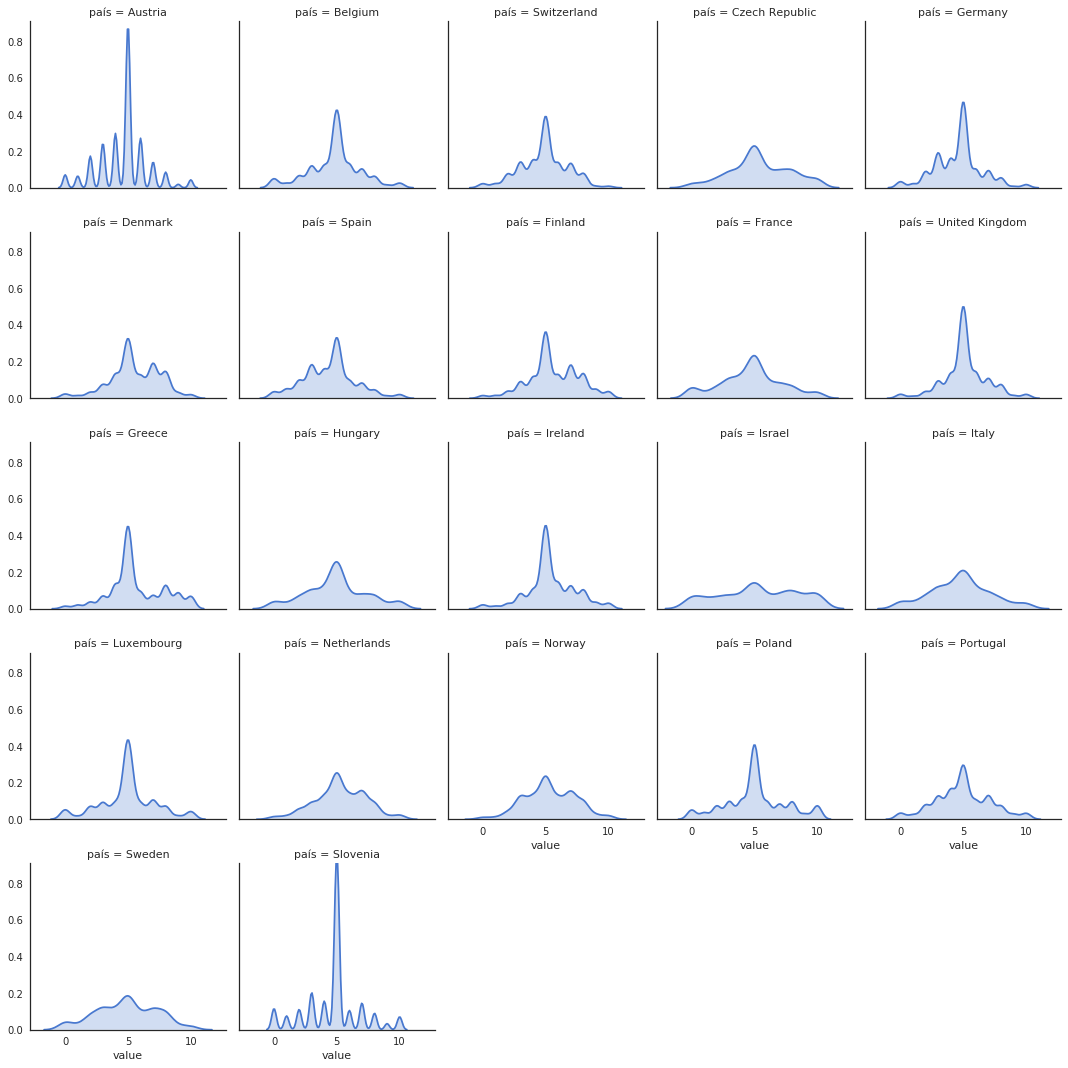

In [81]:
sns.set(style="white", palette="muted", color_codes=True)    
g = sns.FacetGrid(valid_ideo,col = "país", col_wrap = 5)
plt.ylabel("Densidade")
plt.xlabel("Posição Política - Esquerda x Direita")
g = g.map(sns.distplot, "value",hist = False, kde_kws={"shade": True})
plt.savefig("ess2002plots.pdf",dpi = 200)

In [19]:
#display(ideo)
#print(len(ideo.groupby("cntry").count()))
#ideo.groupby("cntry").count()
#print(len(ess2002.index))
# ideo["cntry"].describe()
#ess2002cntry = dict()
#for i in ideo["cntry"].unique():
#   ess2002cntry[i] = ideo.loc[ideo["cntry"] == i]
# display(ideo)

['Austria' 'Belgium' 'Switzerland' 'Czech Republic' 'Germany' 'Denmark'
 'Spain' 'Finland' 'France' 'United Kingdom' 'Greece' 'Hungary' 'Ireland'
 'Israel' 'Italy' 'Luxembourg' 'Netherlands' 'Norway' 'Poland' 'Portugal'
 'Sweden' 'Slovenia']


22

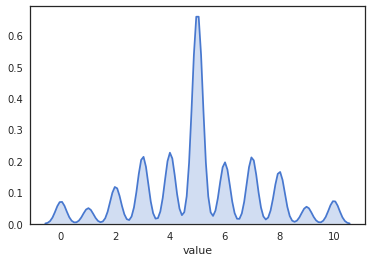

In [42]:
sns.distplot(ideo["value"],hist = False,kde_kws={"shade": True})